In [1]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt

## Using PIL inbuilt function

In [2]:
# rotation using PIL module
image = Image.open("rotate.png")
image.show()

rotate_90 = image.rotate(90)
rotate_90.show()

rotate_180 = image.rotate(180)
rotate_180.show()

## Using Numpy inbuilt function

In [3]:
# rotation using numpy module
im_array = np.array(Image.open('rotate.png'))
print("image 3D array = " , im_array.shape)

rotate_90 = np.rot90(image)
print("90 degree rotated 3D array = ", rotate_90.shape)
rotate_90 = Image.fromarray(rotate_90)
rotate_90.show()

rotate_180 = np.rot90(rotate_90)
print("180 degree rotated 3D array = ", rotate_180.shape)
rotate_180 = Image.fromarray(rotate_180)
rotate_180.show()

image 3D array =  (322, 600, 4)
90 degree rotated 3D array =  (600, 322, 4)
180 degree rotated 3D array =  (322, 600, 4)


## Without using inbuilt function

Shape of image array =  (322, 600, 4)
Enter the rotation angle = 60


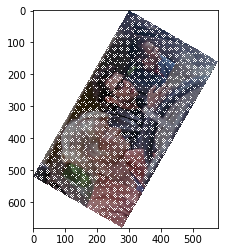

In [5]:
# without using inbuilt functions
image = Image.open("rotate.png")
array = np.array(Image.open('rotate.png'))
print("Shape of image array = ", array.shape)

deg_angle = int(input("Enter the rotation angle = "))
angle = math.radians(deg_angle)

h = array.shape[0]
w = array.shape[1]

min_new_x = 0
max_new_x = 0
min_new_y = 0
max_new_y = 0

# list for finding new coordinates for given angle
new_coordinates = []

'''
Rotation matrix :
[
 [cos(theta) -sin(theta)]
 [sin(theta)  cos(theta)]
]
'''
for x in range(h):
    for y in range(w):
            new_x = int(round(x*math.cos(angle) - y*math.sin(angle)))
            new_y = int(round(x*math.sin(angle) + y*math.cos(angle)))
        
            val = array[x][y][:]
            new_coordinates.append((val, new_x, new_y))
            
            if new_x < min_new_x: 
                min_new_x = new_x
            if new_x > max_new_x: 
                max_new_x = new_x
            if new_y < min_new_y: 
                min_new_y = new_y
            if new_y > max_new_y: 
                max_new_y = new_y

new_height = max_new_x - min_new_x
new_width = max_new_y - min_new_y

rotated = np.empty((new_height + 1, new_width + 1, 4))
rotated.fill(0)

x_offset = abs(min_new_x)
y_offset = abs(min_new_y)

for c in new_coordinates:
    val = c[0]
    x = c[1]
    y = c[2]
    if (rotated[x_offset + x][y_offset + y][0] == 0) & (rotated[x_offset + x][y_offset + y][1] == 0) & (rotated[x_offset + x][y_offset + y][2] == 0) & (rotated[x_offset + x][y_offset + y][3] == 0):
        rotated[x_offset + x][y_offset + y][0] = val[0]
        rotated[x_offset + x][y_offset + y][1] = val[1]
        rotated[x_offset + x][y_offset + y][2] = val[2]
        rotated[x_offset + x][y_offset + y][3] = val[3]

img = Image.fromarray(np.uint8(rotated))
plt.imshow(img,cmap='gray')